# 9. Закрепление знаний

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default') #для корректного отображения графиков на тёмном фоне
import matplotlib.ticker as ticker

import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go

## Инфо о таблице

In [2]:
churn_df = pd.read_csv('data/churn.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* `RowNumber` — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* `CustomerId` — идентификатор клиента
* `Surname` — фамилия клиента
* `CreditScore` — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* `Geography` — страна клиента (банк международный)
* `Gender` — пол клиента
* `Age` — возраст клиента
* `Tenure` — сколько лет клиент пользуется услугами банка
* `Balance` — баланс на счетах клиента в банке
* `NumOfProducts` — количество услуг банка, которые приобрёл клиент
* `HasCrCard` — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* `IsActiveMember` — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* `EstimatedSalary` — предполагаемая заработная плата клиента
* `Exited` — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
max_unique_count = 3 # задаём максимальное число уникальных категорий
for col in churn_df.columns: # цикл по именам столбцов
    if churn_df[col].nunique() <= max_unique_count:
        churn_df[col] = churn_df[col].astype('category') # преобразуем тип столбца
display(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(6), object(1)
memory usage: 752.7+ KB


None

## Задание 9.1

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

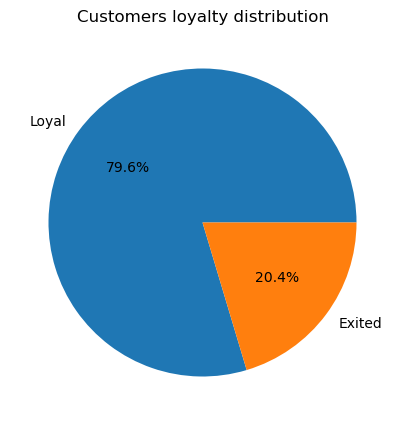

In [4]:
loyalty = churn_df['Exited'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

axes.pie(
    loyalty,
    autopct='%.1f%%',
    labels=['Loyal', 'Exited']
);
axes.set_title('Customers loyalty distribution');

### Выводы

> Из диаграмы видно, что число ушедших клиентов составляет 20.4 % от общего числа клиентов банка.

## Задание 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0.5, 1.0, 'Having a credit card')

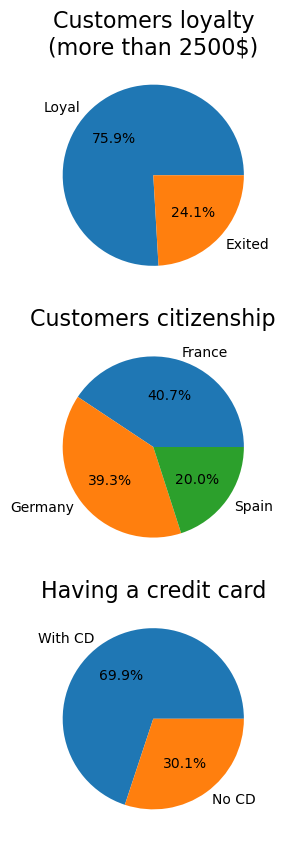

In [5]:
reach_loyalty = churn_df[churn_df['Balance'] > 2500]['Exited'].value_counts()
reach_geo = churn_df[churn_df['Balance'] > 2500]['Geography'].value_counts()
reach_credit = churn_df[churn_df['Balance'] > 2500]['HasCrCard'].value_counts()



fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 10))

axes[0].pie(
    reach_loyalty,
    autopct='%.1f%%',
    labels=['Loyal', 'Exited']
);
axes[0].set_title('Customers loyalty\n(more than 2500$)', fontsize=16);

axes[1].pie(
    reach_geo,
    autopct='%.1f%%',
    labels=reach_geo.index
);
axes[1].set_title('Customers citizenship', fontsize=16)

axes[2].pie(
    reach_credit,
    autopct='%.1f%%',
    labels=['With CD', 'No CD']
);
axes[2].set_title('Having a credit card', fontsize=16)

### Версия с учетом замечаний

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

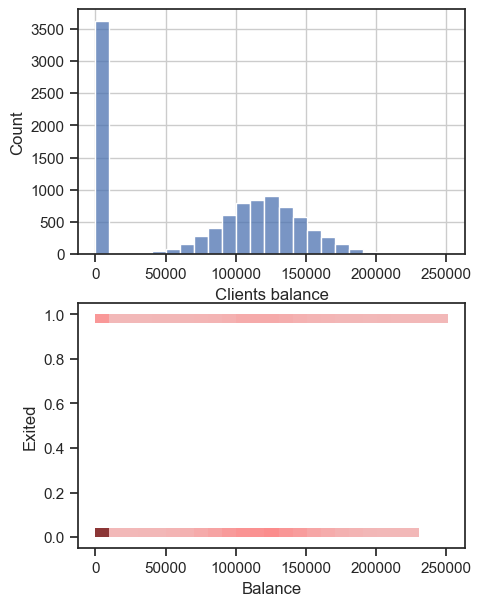

In [41]:
reach_loyalty = churn_df[churn_df['Balance'] > 2500]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))

# строим график распреледеления баланса всех клиентов банка
sns.histplot(
    data=churn_df,
    x='Balance',
    bins=25,
    ax=axes[0]
)

axes[0].grid()
axes[0].set_xlabel('Clients balance')

# строим график распределения баланса клиентов в зависимости
# от того лоялен клиент или нет

sns.histplot(
    data=churn_df,
    x='Balance',
    y='Exited',
    bins=25,
    color='red',
    ax=axes[1]
)

### Выводы

> Пользователи, у которых на счету более 2500 $ показывают лояльность примерно на 4 % меньше, чем все пользователи без фильтрации по балансу.

> Так же видно, что услугами банка (на балансе которых более 2500 $) пользуются граждане Франции, Германии (примерно по 40 % пользователей), а так же Испании, число которых составляет 20 % от общего количества.

> Среди "богатых" пользователей 69.9 % имеют в наличии кредитную карту банка.

> Значительное количество клиетов банка (лояльных) имеют на своём счету 0. Скорее всего открыли счет и забыли.

## Задание 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [6]:
fig = px.box(
    data_frame=churn_df, 
    x=churn_df['Balance'], 
    color='Exited',
    title='Loyal and exited clients balance',
)

fig.show()

### Версия с учетом замечаний

(0.0, 250000.0)

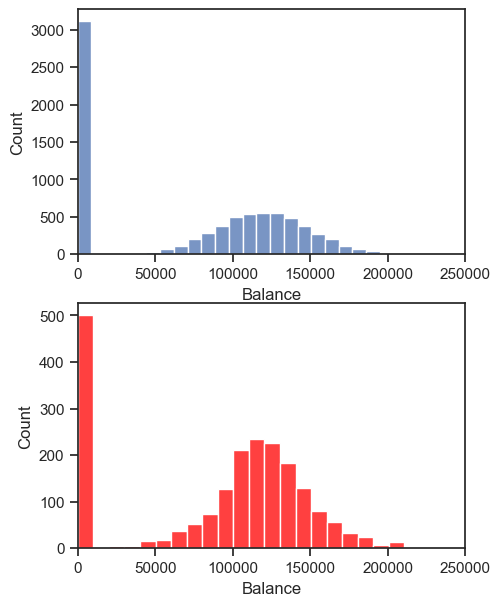

In [45]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(5, 7))

sns.histplot(
    data=churn_df[churn_df['Exited'] == 0],
    x='Balance',
    bins=25,
    ax=axes[0]
)
axes[0].set_xlim(0, 250000)

sns.histplot(
    data=churn_df[churn_df['Exited'] == 1],
    x='Balance',
    bins=25,
    ax=axes[1],
    color='red'
)
axes[1].set_xlim(0, 250000)


### Выводы

> Из графика видно, что медианное значение баланса у уходящих клиентов больше чем у лояльных. И в целом уходящие клиенты богаче лояльных.

> На данном этапе становится видно, что в банке не хватает каких-то услуг для более богатых клиентов.

> Это возможно может быть связано с меньшим процентом на остаток счета по более высоким депозитам.

> upd: порядка 3000 лояльных клиетов банка с нулевым балансом

## Задание 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [7]:
# fig = px.box(
#     data_frame=churn_df, 
#     x=churn_df['Age'], 
#     color='Exited',
#     title='Clients age',
# )

# fig.show()

fig = go.Figure()
fig.add_trace(go.Box(x=churn_df[churn_df['Exited'] == 0]['Age'], name='Loyal'))
fig.add_trace(go.Box(x=churn_df[churn_df['Exited'] == 1]['Age'], name='Exited'))
fig.update_layout(title="Clients age",
                  xaxis_title="Age",
                  )
fig.show()

### Отработка замечаний

(18.0, 100.0)

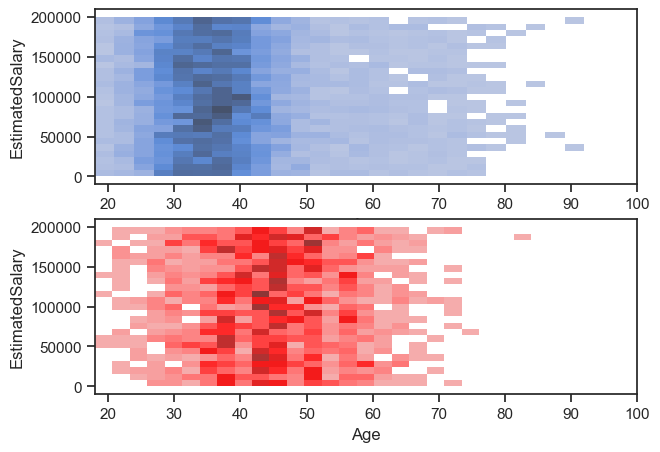

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 5))

sns.histplot(
    data=churn_df[churn_df['Exited'] == 0],
    x='Age',
    y='EstimatedSalary',
    bins=25,
    ax=axes[0]
)

sns.histplot(
    data=churn_df[churn_df['Exited'] == 1],
    x='Age',
    y='EstimatedSalary',
    bins=25,
    ax=axes[1],
    color='red'
)

axes[0].set_xlim(18, 100)
axes[1].set_xlim(18, 100)

### Выводы

> Медианный возраст лояльных клиетов (36) меньше медианного возраста ушедших клиентов (45). Однако, среди лояльных клиентов наблюдается значительное количество выбросов в виде клиентов с возрастом от 57 до 92 лет.

> Учитывая тот факт, что правая граница распределения возраста у ушедших клиентов составляет 71 год, то следовательно необходимо обратить внимание на возрастную группу до 71 года.


## Задание 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [8]:
fig = px.scatter(
    data_frame=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    color='Exited',
    # log_x=True,
    log_y=True,
    opacity=0.5,
    title='Rate between credit rating and salary'
)

fig.show()



# scatterplot = sns.scatterplot(
#     data=churn_df,
#     x='CreditScore',
#     y='EstimatedSalary',
#     hue='Exited',
#     s=100,
    
# );


### Выводы

> Явной взаимосвязи между кредитным рейтингом и предполагаемой зарплатой ни у лояльных ни у ушедших клиентов не наблюдается.

> В диапазоне кредитного рейтинга от 700 до 900 наблюдается небольшая прямая зависимость рейтинга от зарплаты. Т.е. увеличение кредитного рейтинга выше 700 сопровождается увеличением зарплаты.

> В диапазоне кредитного рейтинга до 400, наблюдается небольшое количество **только** ушедших клиентов с почти максимальной (из выборки) зарплатой. **(Т.е богатые, не пользующиеся кредитами - уходят)**

> При дальнейшем увеличении кредитного рейтинга до 650 наблюдается: появление все более бедных людей (как лояльных так и ушедших)

## Задание 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

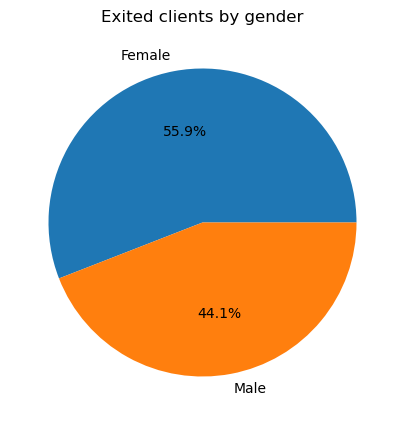

In [9]:
exited_by_gender = churn_df[churn_df['Exited'] == 1]['Gender'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

axes.pie(
    exited_by_gender,
    autopct='%.1f%%',
    labels=exited_by_gender.index,
);
axes.set_title('Exited clients by gender');

### Выводы

> Видно, что чаще уходят женщины

## Задание 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

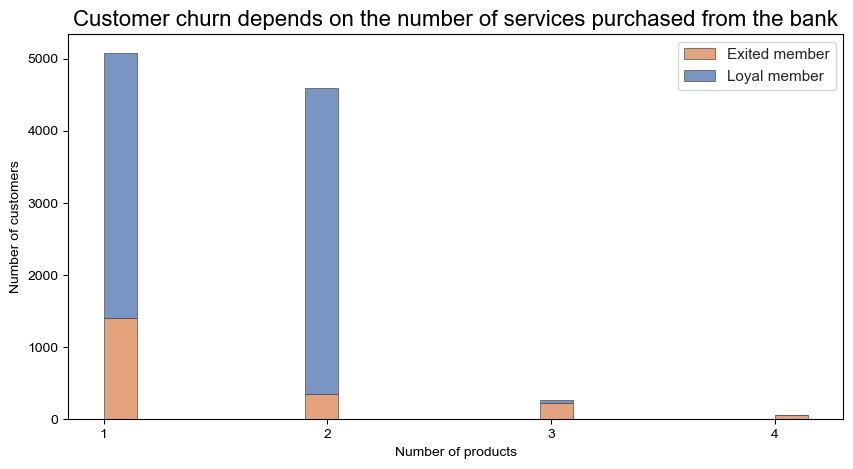

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.set_theme(style="ticks")
# sns.despine(fig)

sns.histplot(
    churn_df,
    x='NumOfProducts', hue='Exited',
    multiple='stack',
    edgecolor=".3",
    linewidth=.5,
    binwidth=0.15
)
axes.set_title('Customer churn depends on the number of services purchased from the bank', fontsize=16)
axes.set_xlabel('Number of products')
axes.set_ylabel('Number of customers')
axes.legend(['Exited member', 'Loyal member'])
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

> Наибольший отток прослеживается среди тех клиентов, которые пользуются одной услугой банка. Как же видно, что клиенты, которые пользуются 2-3 услугами банка так же в незначительной степени могут перейти в группу не лояльных клиентов.

> Среди пользователей с 3 услугами почти нет лояльных клиентов, и число нелояльных по данному признаку уже является преобладающим.

## Задание 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Inactive clients loyalty')

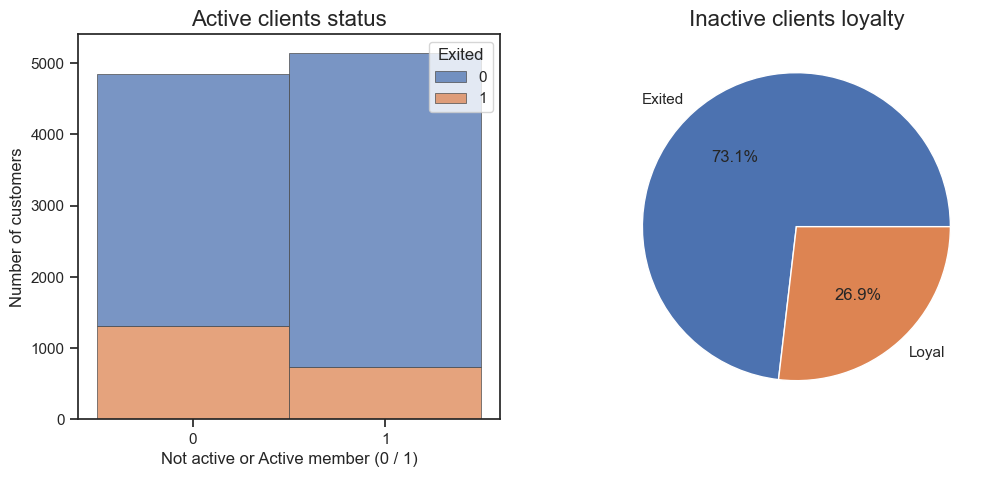

In [11]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.set_theme(style="ticks")

sns.histplot(
    churn_df,
    x='IsActiveMember', hue='Exited',
    multiple='stack',
    edgecolor=".3",
    linewidth=.5,
    binwidth=0.1,
    ax=axes[0],
)
axes[0].set_title('Active clients status', fontsize=16)
axes[0].set_xlabel('Not active or Active member (0 / 1)')
axes[0].set_ylabel('Number of customers')
# axes[0].legend(['Loyal', 'Exited'])
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(1))

axes[1].pie(
    churn_df[churn_df['IsActiveMember'] == 0]['Exited'].value_counts(),
    autopct='%.1f%%',
    labels=['Exited', 'Loyal']
);
axes[1].set_title('Inactive clients loyalty', fontsize=16)

### Выводы

> Среди неактивных клиентов наблюдается наблюдается примерно в 2 раза больший отток клиентов, чем среди активных.

Исходя из того, что пока не понятно, в чем заключается активность клиента, я предполагаю, что неактивный - это например такой клиент, который сделал вклад в банке под процент и больше никакими услугами банка не пользуется.

> далее в п.9.5 прослеживалась закономерность, что клиенты с маленьким кредитным рейтингом - не лояльные. Если маленький кредитный рейтинг, следовательно предполагаю, что кредиты они не берут (нет необходимости, так как достаточно денег), а предпочитают вклады. Так же, согласно п. 9.7. видно, что наибольший отток опять же наблюдается среди клиентов, пользующихся 1 услугой (рискну предположить, что это вклады)

> Поэтому банку можно предложить сделать более выгодный процент по дорогостоящим вкладам, либо сделать более выгодные условия выгоднее относительно размера совершенных операций клиента (больльше тратишь - выгоднее условия).

## Задание 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [12]:
exited_by_geo = churn_df.pivot_table(
    values='CustomerId',
    index='Geography',
    columns='Exited',
    aggfunc='count',
    
    
)
exited_by_geo['rate'] = exited_by_geo[1] / exited_by_geo[0] * 100

exited_by_geo


Exited,0,1,rate
Geography,,,
France,4204,810,19.267364
Germany,1695,814,48.023599
Spain,2064,413,20.009690


In [13]:
fig = px.choropleth(
    data_frame=exited_by_geo,
    locations=exited_by_geo.index,
    locationmode='country names',
    color='rate',
    range_color=[0, 100],
    title='Exited by countries',
    width=800,
    height=500,
    color_continuous_scale='viridis',
    scope='europe'
)

fig.show()

### Выводы

> Доля ушедших клиентов значительно выше в Германии, а в Испании и Франции примерно на одном уровне. 
> Возможно другие банки предлагают более выгодные условия для жителей Германии.
> Либо какие-то услуги не доступны для жителей Германии.

## Задание 9.10

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [15]:
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

In [16]:
churn_df['Exited'] = churn_df['Exited'].astype('int')

tenure_churn = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
)

Text(0.5, 1.0, 'Тепловая карта среднего числа оттока клиентов\n относительно их кредитного рейтинга и сроком\n пользования банком')

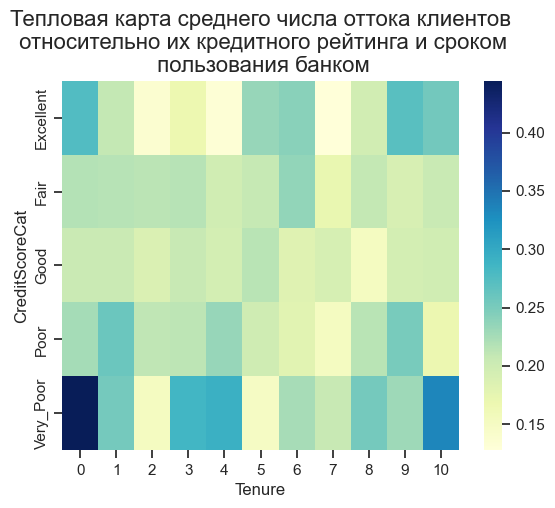

In [17]:
heatmap = sns.heatmap(
    data=tenure_churn,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта среднего числа оттока клиентов\n относительно их кредитного рейтинга и сроком\n пользования банком', fontsize=16)

### С учетом замечаний

Та же таблица без клиентов с нулевым балансом

Text(0.5, 1.0, 'Тепловая карта среднего числа оттока клиентов\n относительно их кредитного рейтинга и сроком\n пользования банком')

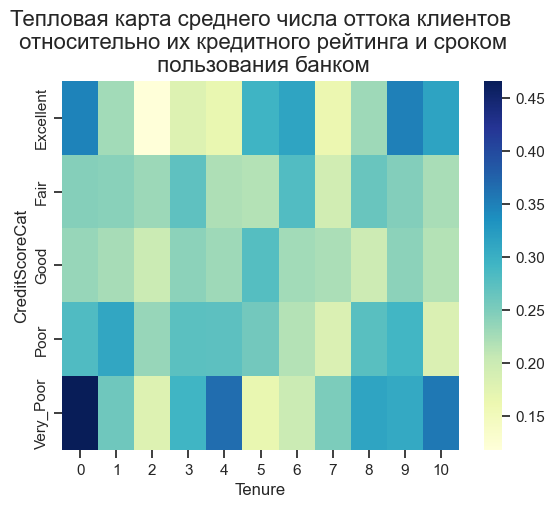

In [59]:
tenure_churn_with_money = churn_df[churn_df['Balance'] > 0].pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
)

heatmap = sns.heatmap(
    data=tenure_churn_with_money,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта среднего числа оттока клиентов\n относительно их кредитного рейтинга и сроком\n пользования банком', fontsize=16)

### Выводы

> Тепловая карта показывает, что наибольший отток клиентов наблюдается среди пользователей с очень плохим кредитным рейтингом, пользующихся банком менее года.

> В целом наибольший отток наблюдается среди клиентов с очень плохим кредитным рейтингом, либо в чуть более низкой степени среди клиентов с отличным рейтингом.